In [1]:
import keras

from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

2026-01-20 17:44:14.895116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768931054.916072     103 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768931054.922336     103 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768931054.939035     103 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768931054.939065     103 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768931054.939068     103 computation_placer.cc:177] computation placer alr

In [ ]:
df = pd.read_csv("Data/internet_customer_churn.csv")
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
48059,48060,25,Female,1,26,9,25,Standard,Monthly,708,14,1
21032,21033,52,Male,46,16,1,9,Premium,Quarterly,673,2,0
17515,17516,20,Female,48,29,8,9,Basic,Monthly,640,7,0
40136,40137,47,Male,23,17,4,27,Basic,Annual,710,10,0
38051,38052,47,Female,42,7,6,23,Standard,Monthly,261,21,1


In [3]:
df.drop('CustomerID',axis='columns',inplace=True)
# df.drop('Name',axis='columns',inplace=True)

In [4]:
df.dtypes

Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object

In [5]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
df['Total Spend'].values, df['Last Interaction'].values

(array([598, 584, 757, ..., 327, 540, 696]),
 array([ 9, 20, 21, ..., 20, 13, 22]))

In [7]:
df.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
df.shape

(64374, 11)

In [9]:
object_columns = df.dtypes[df.dtypes == 'object'].index.tolist()
df_processed = pd.get_dummies(df, columns=object_columns, dtype=int)
df_processed.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1,1,0,1,0,0,0,1,0
1,41,28,28,7,13,584,20,0,1,0,0,0,1,0,1,0
2,47,27,10,2,29,757,21,0,0,1,0,1,0,1,0,0
3,35,9,12,5,17,232,18,0,0,1,0,1,0,0,0,1
4,53,58,24,9,2,533,18,0,1,0,0,0,1,1,0,0


In [10]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

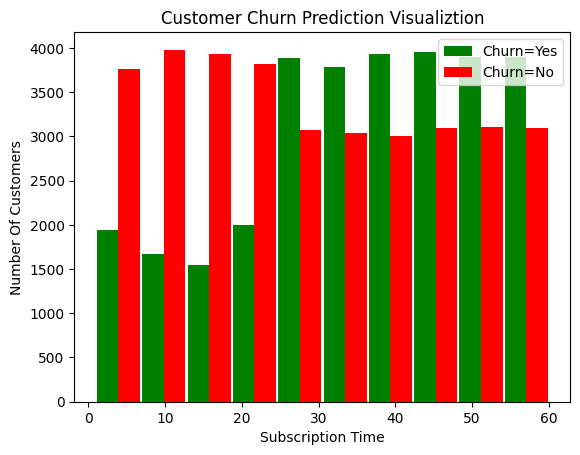

In [11]:
tenure_churn_no = df_processed[df_processed.Churn==0]['Tenure']
tenure_churn_yes = df_processed[df_processed.Churn==1]['Tenure']

plt.xlabel("Subscription Time")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

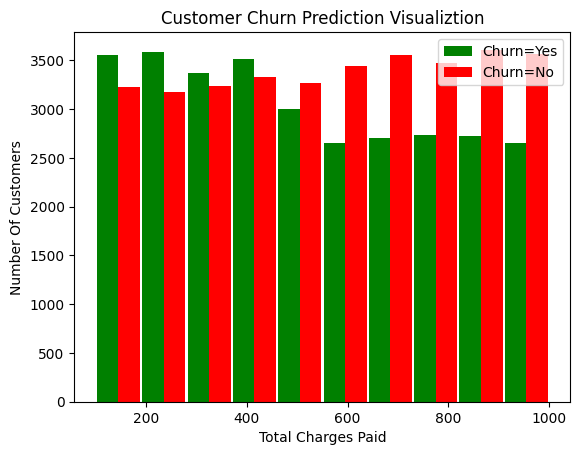

In [12]:
mc_churn_no = df_processed[df_processed.Churn==0]['Total Spend']
mc_churn_yes = df_processed[df_processed.Churn==1]['Total Spend']

plt.xlabel("Total Charges Paid")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

In [13]:
X = df_processed.drop('Churn',axis='columns')
y = df_processed['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.05,random_state=5)

In [16]:
X_train.shape

(48924, 15)

In [17]:
X_test.shape

(12875, 15)

In [18]:
y_train = to_categorical(y_train)
y_val =  to_categorical(y_val)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((48924, 2), (12875, 2))

In [19]:
import tensorflow as tf
from tensorflow import keras

class PrintCall(tf.keras.callbacks.Callback):
    def __init__(self, interval=10):
        self.interval = interval
        
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            print(f"\nEpoch {epoch + 1}", end=" ")
            for k, v in logs.items():
                print(f"{k}: {v:.4f}", end=" ")

In [20]:
input_shape = X_train.shape[1]
num_classes = y_train.shape[1]

# define classification model
def classification_model():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    
    
    # compile model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

input_shape, num_classes

(15, 2)

In [21]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1024, epochs=100, verbose=0, callbacks=[(PrintCall(interval=10))])

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

I0000 00:00:1768931063.188353     103 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1768931065.496752     139 service.cc:152] XLA service 0x7b122c007b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768931065.496783     139 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1768931065.753283     139 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1768931066.575721     139 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 10 accuracy: 0.9339 loss: 0.1600 val_accuracy: 0.9278 val_loss: 0.1656 
Epoch 20 accuracy: 0.9585 loss: 0.1040 val_accuracy: 0.9538 val_loss: 0.1173 
Epoch 30 accuracy: 0.9700 loss: 0.0764 val_accuracy: 0.9600 val_loss: 0.0917 
Epoch 40 accuracy: 0.9759 loss: 0.0620 val_accuracy: 0.9662 val_loss: 0.0771 
Epoch 50 accuracy: 0.9802 loss: 0.0531 val_accuracy: 0.9693 val_loss: 0.0692 
Epoch 60 accuracy: 0.9820 loss: 0.0470 val_accuracy: 0.9736 val_loss: 0.0617 
Epoch 70 accuracy: 0.9841 loss: 0.0422 val_accuracy: 0.9763 val_loss: 0.0588 
Epoch 80 accuracy: 0.9856 loss: 0.0379 val_accuracy: 0.9763 val_loss: 0.0539 
Epoch 90 accuracy: 0.9871 loss: 0.0345 val_accuracy: 0.9794 val_loss: 0.0514 
Epoch 100 accuracy: 0.9886 loss: 0.0316 val_accuracy: 0.9817 val_loss: 0.0479 

In [22]:
y_train.mean()

np.float64(0.5)

In [23]:
scores[0], scores[1]

(0.045287344604730606, 0.981747567653656)

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train[:,1])

print("Log Reg train acc:", lr.score(X_train, y_train[:,1]))
# print("LogReg val acc:", lr.score(X_val, y_val))

Log Reg train acc: 0.8276101708772791


In [26]:
import numpy as np

rng = np.random.default_rng(seed=36)

indices = rng.choice(len(X_test), size=10, replace=False)
probs = model.predict(X_test[indices])
y_pred = probs.argmax(axis=1)

true_label = y_test[indices].argmax(axis=1)
pred_label = y_pred

print(f'True Labels: {true_label}\nPredicted Labels: {pred_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
True Labels: [1 0 1 0 1 0 1 0 0 1]
Predicted Labels: [1 0 1 0 1 0 1 0 0 1]
